In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA_DIR = "data"
DATA_FILE = "data.csv"

sns.set()

In [2]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA_FILE))
df.head()

,estimator,point,ppf_025,ppf_975,recommended_effect,sim_no,n_policies,best_effect
0,Conventional,1.764052,-0.195912,3.724016,0.0,0,2,0.0
1,Conditional,1.625455,-1.283829,3.716464,0.0,0,2,0.0
2,Hybrid,1.627837,-0.937786,3.741723,0.0,0,2,0.0
3,Projection,1.764052,-0.472244,4.000349,0.0,0,2,0.0
4,Conventional,2.764052,0.804088,4.724016,1.0,0,2,1.0


In [3]:
df["coverage"] = ((df.ppf_025 <= df.recommended_effect) & (df.recommended_effect <= df.ppf_975)).astype(int)
df["probability_bias"] = (df.point > df.recommended_effect).astype(int) - .5
df["len_ci"] = df.ppf_975 - df.ppf_025
df["mae"] = abs(df.point - df.recommended_effect)
df.groupby(["estimator", "n_policies", "best_effect"])[["coverage", "probability_bias", "len_ci", "mae"]].mean()

coverage  probability_bias     len_ci  \
estimator   n_policies best_effect                                          
Conditional 2          0.0             0.955            -0.001  10.142884   
                       1.0             0.948            -0.015   9.648438   
                       2.0             0.960            -0.008   7.083968   
                       3.0             0.963             0.002   4.725212   
                       4.0             0.953             0.005   4.122700   
...                                      ...               ...        ...   
Projection  50         5.0             0.998             0.015   6.556127   
                       6.0             1.000             0.007   6.556127   
                       7.0             0.999             0.006   6.556127   
                       8.0             0.999             0.006   6.556127   
                       9.0             0.999             0.006   6.556127   

                                         mae  
estimator   n_policies best_effect            
Conditional 2          0.0          2.137147  
                       1.0          2.204300  
                       2.0          1.367521  
                       3.0          0.892205  
                       4.0          0.802024  
...                                      ...  
Projection  50         5.0          0.783514  
                       6.0          0.777109  
                       7.0          0.777624  
                       8.0          0.777624  
                       9.0          0.777624  

[120 rows x 4 columns]

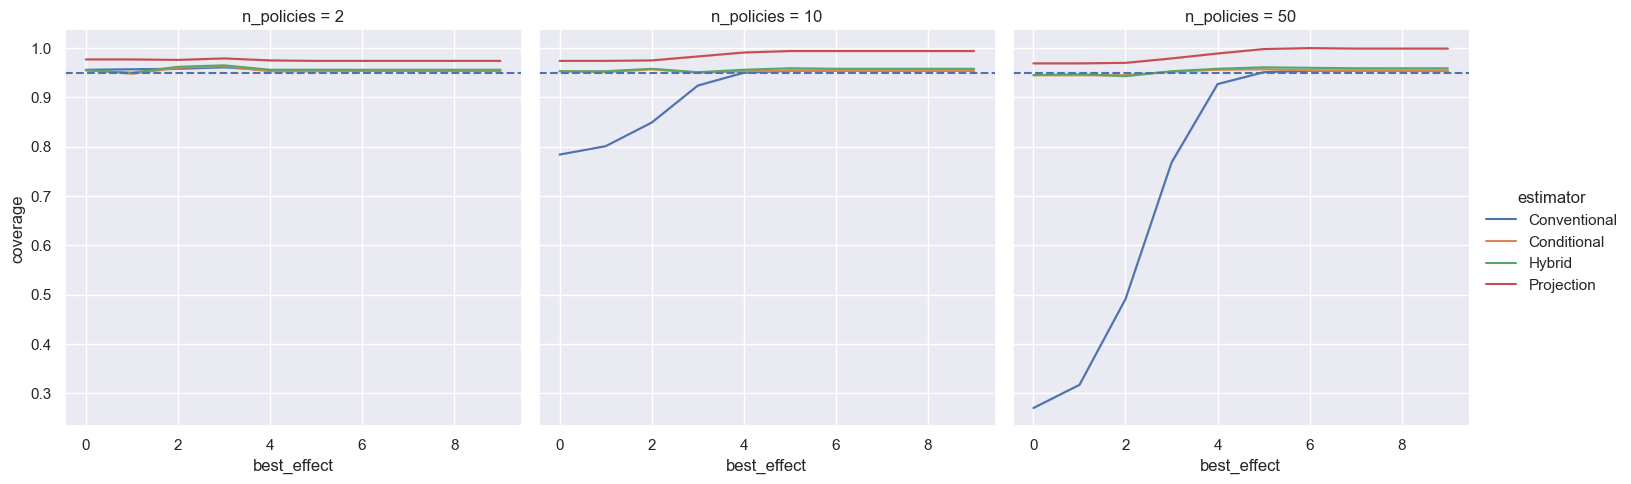

In [4]:
g = sns.relplot(
    data=df,
    x="best_effect",
    y="coverage",
    hue="estimator",
    col="n_policies",
    kind="line",
    ci=False
)
for ax in g.axes[0]:
    ax.axhline(.95, linestyle="--")
plt.show()

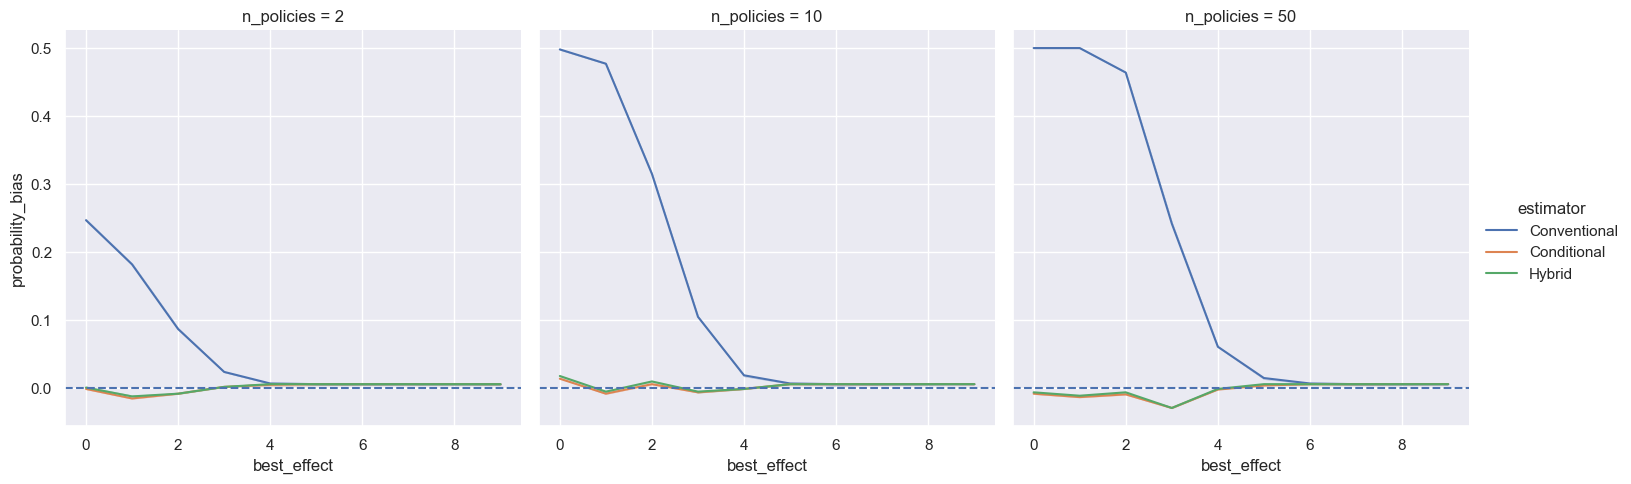

In [5]:
g = sns.relplot(
    data=df[df.estimator.isin(["Conventional", "Conditional", "Hybrid"])],
    x="best_effect",
    y="probability_bias",
    hue="estimator",
    col="n_policies",
    kind="line",
    ci=False
)
for ax in g.axes[0]:
    ax.axhline(0, linestyle="--")
plt.show()

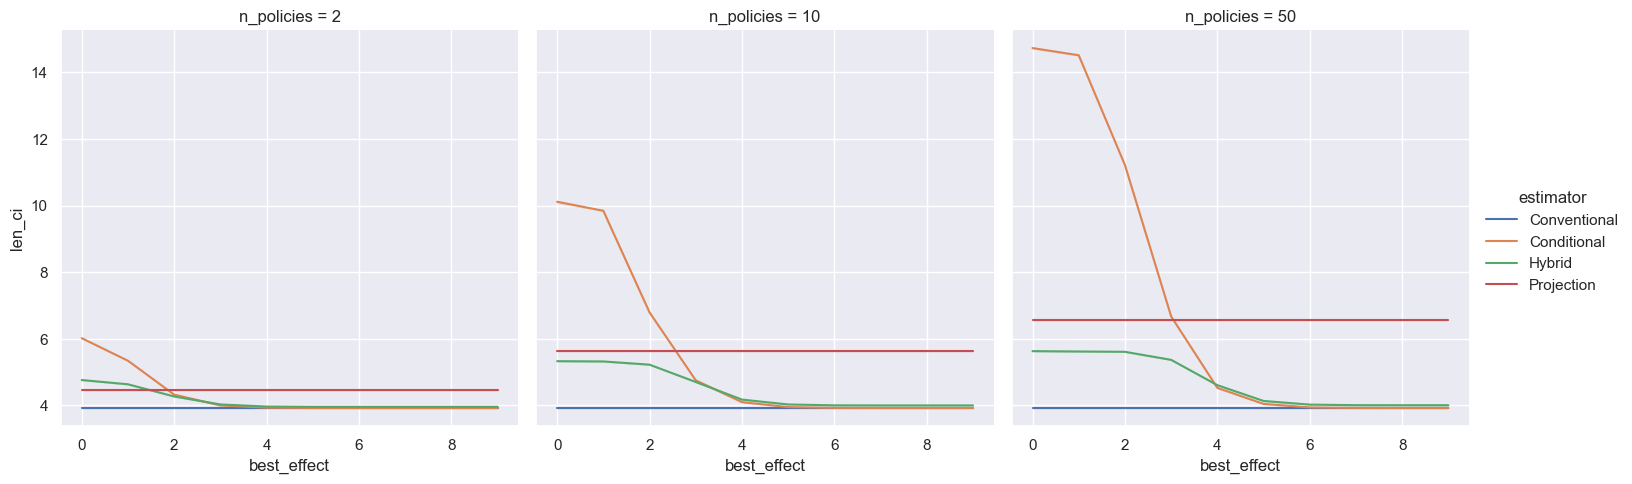

In [6]:
g = sns.relplot(
    data=df,
    x="best_effect",
    y="len_ci",
    hue="estimator",
    col="n_policies",
    kind="line",
    ci=False,
    estimator=lambda x: np.quantile(x, .5)
)
plt.show()

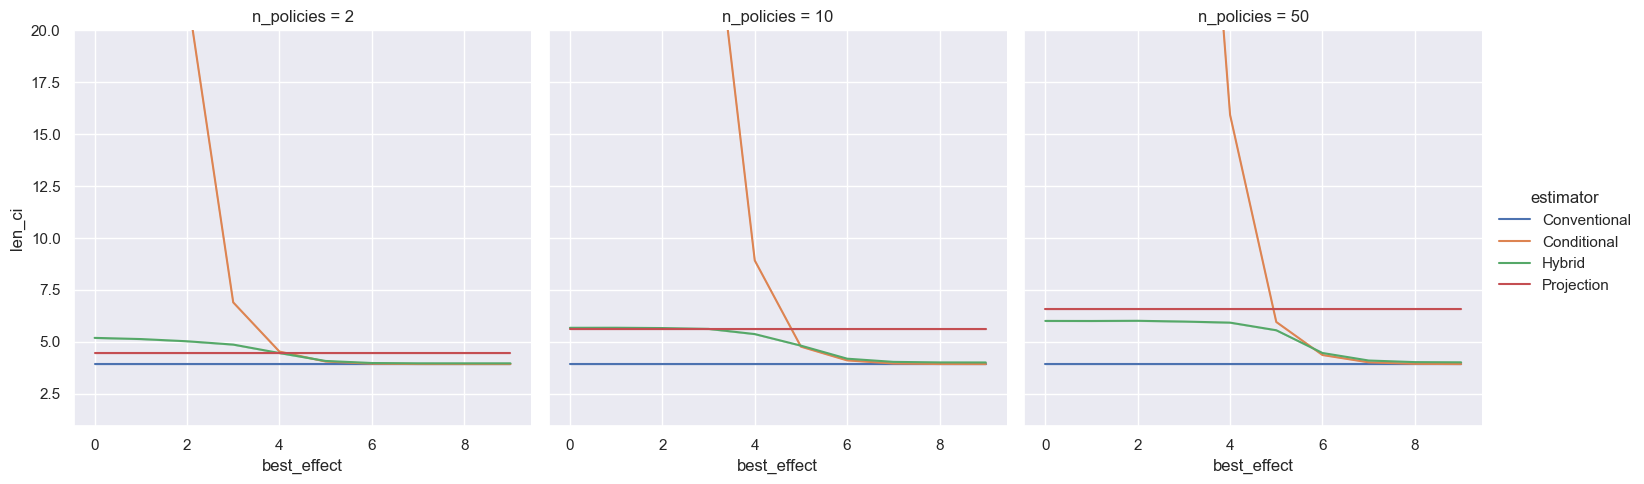

In [7]:
g = sns.relplot(
    data=df,
    x="best_effect",
    y="len_ci",
    hue="estimator",
    col="n_policies",
    kind="line",
    ci=False,
    estimator=lambda x: np.quantile(x, .95)
)
g.set(ylim=(None, 20))
plt.show()

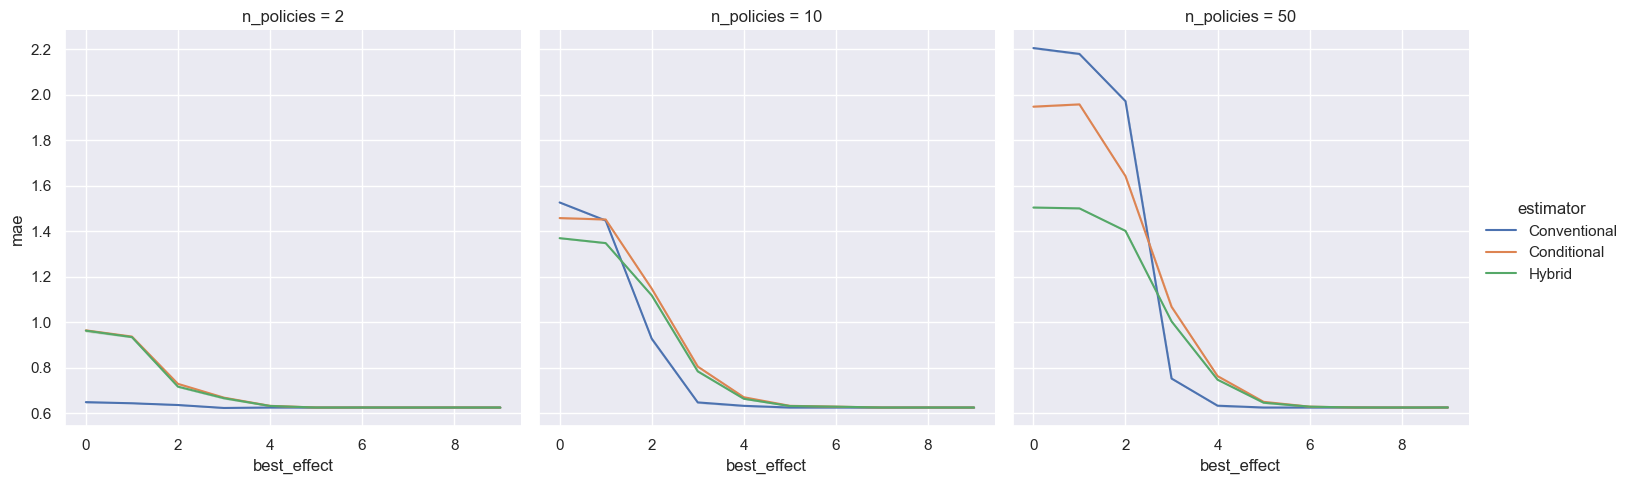

In [10]:
g = sns.relplot(
    data=df[df.estimator.isin(["Conventional", "Conditional", "Hybrid"])],
    x="best_effect",
    y="mae",
    hue="estimator",
    col="n_policies",
    kind="line",
    ci=False,
    estimator=lambda x: np.quantile(x, .5)
)
plt.show()